In [3]:
import torch
import torch.nn as nn

# LayerNormalization

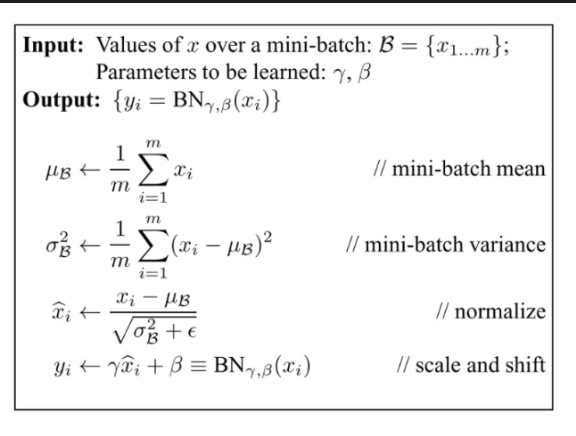

In [4]:
class LayerNorm(nn.Module):
    def __init__(self, embed_dim, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.eps = eps
        self.scale = nn.Parameter(torch.ones(embed_dim)) # gamma
        self.shift = nn.Parameter(torch.zeros(embed_dim)) # beta

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.scale * (x - mean) / (std + self.eps) + self.shift

# RMS Normalization

In [5]:
class RMSNorm(nn.Module):
    def __init__(self, embed_dim, epsilon=1e-8):
        super(RMSNorm, self).__init__()
        self.epsilon = epsilon
        self.scale = nn.Parameter(torch.ones(embed_dim))

    def forward(self, x):
        return x / torch.sqrt((x ** 2).mean(-1, keepdim=True) + self.epsilon) * self.scale